# Chicago Tribune

Her fremvises grafer og data fra Chicago tribune arkivet.

## Chicago tribune arkivet
Newspapers.com har digitaliseret alle udgaver af chicago tribune, dog kun som billeder og man kan derfor ikke bruge en API til at hente metadataen i avisen. Derfor har vi selv fundet lidt over 3000 reklamer fra avisen og indsat dem i følgene excel dokument:

<a href="./reklame_regneark.xlsx" download="reklame_regneark.xlsx">Download Excel Fil</a>

Da det ville være umuligt at gennemgå alle aviser udgivet i vores undersøgelsesperiode, har vi valgt at fokusere på en bestemt gruppe af aviser. Disse aviser er omhyggeligt udvalgt for at sikre en ligelig fordeling på tværs af ugedage, år og måneder. Dette betyder, at for hvert år i vores undersøgelse har vi inkluderet 12 aviser, én for hver måned. Derefter har vi beregnet en metode til at distribuere ugedagene lige så jævnt som muligt.

Den følgene kode ligner meget hvad vi allerede har forklaret, og forklaringen på koden vil derfor være minimal.

### Antal reklamer per år
Nedenstående kode forsøger at udregne hvor mange reklamer der har været, for hvert år.

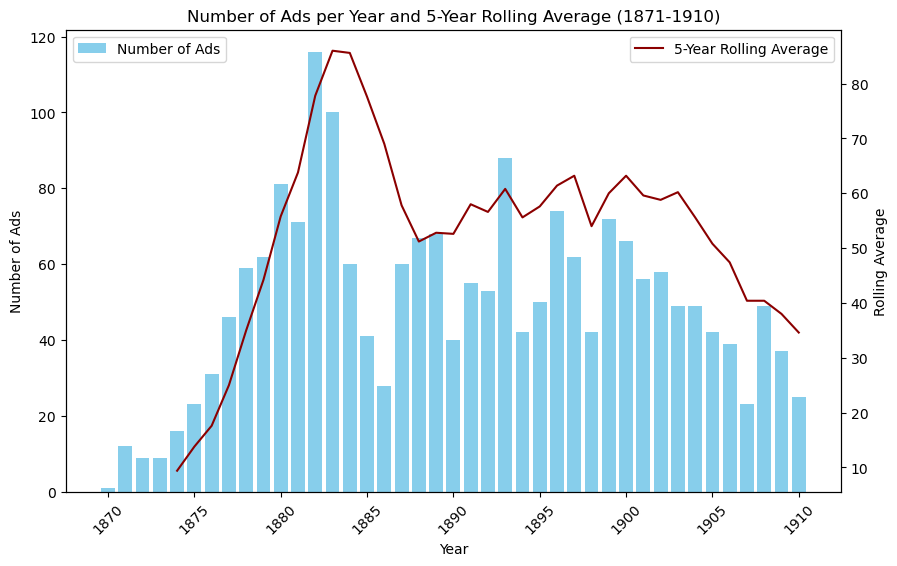

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import openpyxl as xl
reklame_df = pd.read_excel("reklame_regneark.xlsx")

yearly_counts = reklame_df['År'].value_counts().sort_index()
rolling_average = yearly_counts.rolling(window=5).mean()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(yearly_counts.index, yearly_counts, color='skyblue', label='Number of Ads')
ax2 = ax1.twinx()  
ax2.plot(rolling_average.index, rolling_average, color='darkred', label='5-Year Rolling Average')
ax2.set_ylabel('Rolling Average')  
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Ads')
ax1.set_title('Number of Ads per Year and 5-Year Rolling Average (1871-1910)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.tick_params(axis='x', rotation=45)

plt.show()


### Ugedage
Herefter vil det være interresant at kigge på, hvilke ugedage, som har været mest reklameret i.

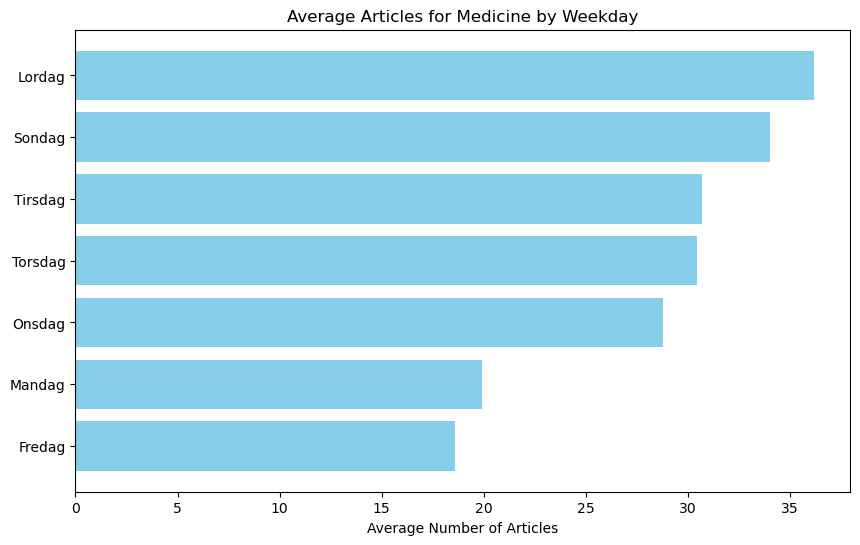

In [41]:
# beregningen af det gennemsnitslige antal reklamer per ugedag kan findes på slide 2 i excel dokumentet
weekdays = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lordag', 'Sondag']
average_articles = [19.91666667, 30.66666667, 28.75, 30.41666667, 18.58333333, 36.14285714, 34]

data = pd.DataFrame({'Weekday': weekdays, 'Average Articles': average_articles})

data = data.sort_values(by='Average Articles', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(data['Weekday'], data['Average Articles'], color='skyblue')
plt.xlabel('Average Number of Articles')
plt.title('Average Articles for Medicine by Weekday')
plt.gca().invert_yaxis()  # Invert the y-axis for Monday to appear at the top

# Display the graph
plt.show()



Dette giver god mening, da både søndags og lørdags udgaverne var betydeligt længere end andre ugedages aviser.